In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# showing all columns
pd.set_option('display.max_columns', None)
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris)

In [11]:
iris_df = pd.DataFrame(data = iris['data'], columns = iris_data['feature_names'])
iris_df.head(10)

NameError: name 'iris_data' is not defined

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Combine the data and target arrays
combined = list(zip(X,y))

# Shuffle the combined list
shuffled_data = shuffle(combined, random_state=42)

# Unzip the shuffled data
X,y = zip(*shuffled_data)


# Standardize the features using Z-score normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

#Calculating distance matrix
def calculate_distance_matrix(X_train,X_test):
    m = X_train.shape[0]
    n = X_test.shape[0]
    distance_matrix = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            distance = euclidean(X_test[i], X_train[j])
            distance_matrix[i, j] = distance
    return distance_matrix

def knn_normal_pred(y_train, dist_row, k):
    
    indices = np.argsort(dist_row)[:k]
    closest = np.array([y_train[i] for i in indices])
    pred = np.bincount(closest).argmax()
    return pred

def KNN_Normal(X_train, y_train, X_test, k,distance_matrix):
    predictions = [knn_normal_pred(y_train, dist_row, k) for dist_row in distance_matrix]
    return np.array(predictions)
# Set the value of k
k_value = 3

distance_matrix = calculate_distance_matrix(X_train,X_test)

# Make predictions using KNN
predictions = KNN_Normal(X_train, y_train, X_test, k_value,distance_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.78%


In [13]:
def knn_weighted_pred(y_train, dist_row, k):
    indices = np.argsort(dist_row)[:k]
    near_distances = np.array([dist_row[i] for i in indices])
    closest = [y_train[i] for i in indices]
  
    # Add small constant to avoid division by zero 
    weights = 1.0 / (near_distances + 1e-8)
    
    # Calculating weighted votes for each class
    weighted_votes = np.bincount(closest, weights=weights)
    
    # Predicing the class with the maximum weighted votes
    pred_label = np.argmax(weighted_votes)
    return pred_label


def KNN_Weighted(X_train, y_train, X_test, k,distance_matrix):
    predictions = [knn_weighted_pred(y_train, dist_row, k) for dist_row in distance_matrix]
    return np.array(predictions)
# Set the value of k
k_value = 5

# Make predictions using KNN
predictions = KNN_Weighted(X_train, y_train, X_test, k_value,distance_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.56%


K = 1, Accuracy = 97.78%
K = 3, Accuracy = 97.78%
K = 5, Accuracy = 95.56%
K = 10, Accuracy = 95.56%
K = 20, Accuracy = 95.56%


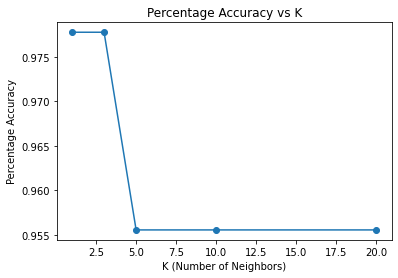


Best K value: 1


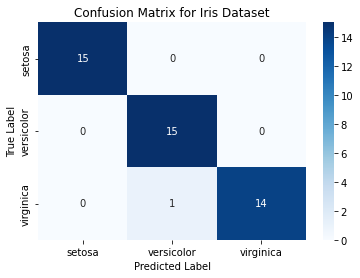

In [14]:
# Function to calculate the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

k_values = [1, 3, 5, 10, 20]

# List to store accuracy for each K
accuracies = []

# Iterate over K values
for k in k_values:
    predictions = KNN_Normal(X_train, y_train, X_test, k,distance_matrix)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"K = {k}, Accuracy = {accuracy * 100:.2f}%")

# Plot Percentage Accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.title('Percentage Accuracy vs K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Percentage Accuracy')
plt.show()

# Find the best K
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K value: {best_k}")

# Plot confusion matrix for the best K
predictions = KNN_Normal(X_train, y_train, X_test, best_k,distance_matrix)
conf_matrix = confusion_matrix(y_test, predictions)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

K = 1, Accuracy = 97.78%
K = 3, Accuracy = 97.78%
K = 5, Accuracy = 95.56%
K = 10, Accuracy = 97.78%
K = 20, Accuracy = 97.78%


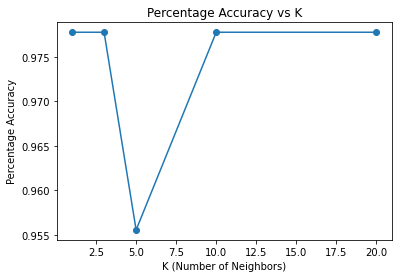


Best K value: 1


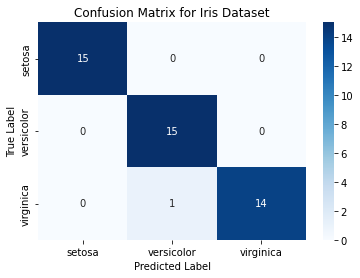

In [15]:
accuracies.clear()

# Iterate over K values
for k in k_values:
    predictions = KNN_Weighted(X_train, y_train, X_test, k,distance_matrix)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"K = {k}, Accuracy = {accuracy * 100:.2f}%")

# Plot Percentage Accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.title('Percentage Accuracy vs K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Percentage Accuracy')
plt.show()

# Find the best K
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K value: {best_k}")

# Plot confusion matrix for the best K
predictions = KNN_Weighted(X_train, y_train, X_test, best_k,distance_matrix)
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
#Considering optimal k found to be 3 in both cases as for both k=1 and 3 accuracy is same in both KNN_Normal and KNN_Weighted

# Function to add noise to a fraction of data
def add_noise(data, fraction, mean=0, std_dev=1.0, random_state=None):
    np.random.seed(random_state)
    noisy_indices = np.random.choice(len(data), size=int(fraction * len(data)), replace=False)
    noise = np.random.normal(loc=mean, scale=std_dev, size=data[noisy_indices].shape)
    data[noisy_indices] += noise
    return data

opt_k=3
# Add noise to 10% of the training data
X_train_noisy = add_noise(X_train.copy(), fraction=0.1, mean=0, std_dev=1.0, random_state=42)

# Shuffle the noisy training data
X_train_noisy, y_train_noisy = shuffle(X_train_noisy, y_train, random_state=42)



predictions = KNN_Normal(X_train_noisy, y_train_noisy, X_test, opt_k,distance_matrix)
accuracy = accuracy_score(y_test, predictions)

print(f"K = {opt_k}, Accuracy for KNN_Normal= {accuracy * 100:.2f}%")

predictions = KNN_Weighted(X_train_noisy, y_train_noisy, X_test, opt_k,distance_matrix)
accuracy = accuracy_score(y_test, predictions)

print(f"K = {opt_k}, Accuracy for KNN_Weighted= {accuracy * 100:.2f}%")


K = 3, Accuracy for KNN_Normal= 24.44%
K = 3, Accuracy for KNN_Weighted= 22.22%


All Features: Accuracy = 97.78%
Petal Parameters: Accuracy = 97.78%
Sepal Parameters: Accuracy = 73.33%
Length Parameters: Accuracy = 95.56%
Width Parameters: Accuracy = 97.78%


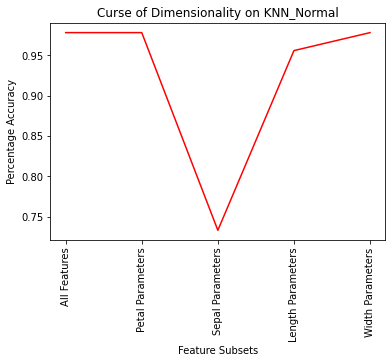

In [18]:
# Different subsets of features
feature = [
    ('All Features', [0, 1, 2, 3]),
    ('Petal Parameters', [2, 3]),
    ('Sepal Parameters', [0, 1]),
    ('Length Parameters', [0, 2]),
    ('Width Parameters', [1, 3])
]

# List to store accuracy for each subset of features
accuracies = []

# Iterate over feature subsets
for name, ind in feature:
    # Select the subset of features
    X_subset = X[:, ind]

    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)
    distance_matrix = calculate_distance_matrix(X_train,X_test)
#     print(X_train)
    # Calculate accuracy for the subset of features
    predictions = KNN_Normal(X_train, y_train, X_test, opt_k,distance_matrix)
    accuracy = accuracy_score(y_test, predictions)
    
    accuracies.append((name, accuracy))
    print(f"{name}: Accuracy = {accuracy * 100:.2f}%")

# Plotting the accuracies for different feature subsets
names, subset_accuracies = zip(*accuracies)
plt.plot(names, subset_accuracies, color='red')
plt.title('Curse of Dimensionality on KNN_Normal')
plt.xlabel('Feature Subsets')
# Rotate x-axis tick labels vertically
plt.xticks(rotation='vertical')
plt.ylabel('Percentage Accuracy')
plt.show()